In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

In [ ]:
data_train = pd.read_csv('dataset.csv')

 # Просмотр данных

In [ ]:
data_train.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

**Количество записей:** 114000

**Количество столбцов:** 21

**Пропуски данных:** Почти все столбцы полностью заполнены (114000 non-null), кроме:
1. artists (113999 non-null)
2. album_name (113999 non-null)
3. track_name (113999 non-null)
**Распределение переменных по типам данных:**

**Числовые:**

popularity, duration_ms, key, mode, time_signature, danceability, energy, loudness, speechiness, acousticness, instrumentalness, liveness, valence, tempo

**Категориальные:**

track_id, artists, album_name, track_name, track_genre

**Булевы:**

explicit

#Предобработка данных

Удаление дубликатов

In [ ]:
data_train.drop_duplicates(['track_id'],inplace=True)

Удаление пропусков

In [ ]:
data_train = data_train.dropna(axis=0)

Удаление незначащих категорий

In [ ]:
data_train = data_train.drop(['Unnamed: 0', 'track_id'], axis=1)

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           89740 non-null  object 
 1   album_name        89740 non-null  object 
 2   track_name        89740 non-null  object 
 3   popularity        89740 non-null  int64  
 4   duration_ms       89740 non-null  int64  
 5   explicit          89740 non-null  bool   
 6   danceability      89740 non-null  float64
 7   energy            89740 non-null  float64
 8   key               89740 non-null  int64  
 9   loudness          89740 non-null  float64
 10  mode              89740 non-null  int64  
 11  speechiness       89740 non-null  float64
 12  acousticness      89740 non-null  float64
 13  instrumentalness  89740 non-null  float64
 14  liveness          89740 non-null  float64
 15  valence           89740 non-null  float64
 16  tempo             89740 non-null  float64
 1

#Анализ распределения числовых переменных

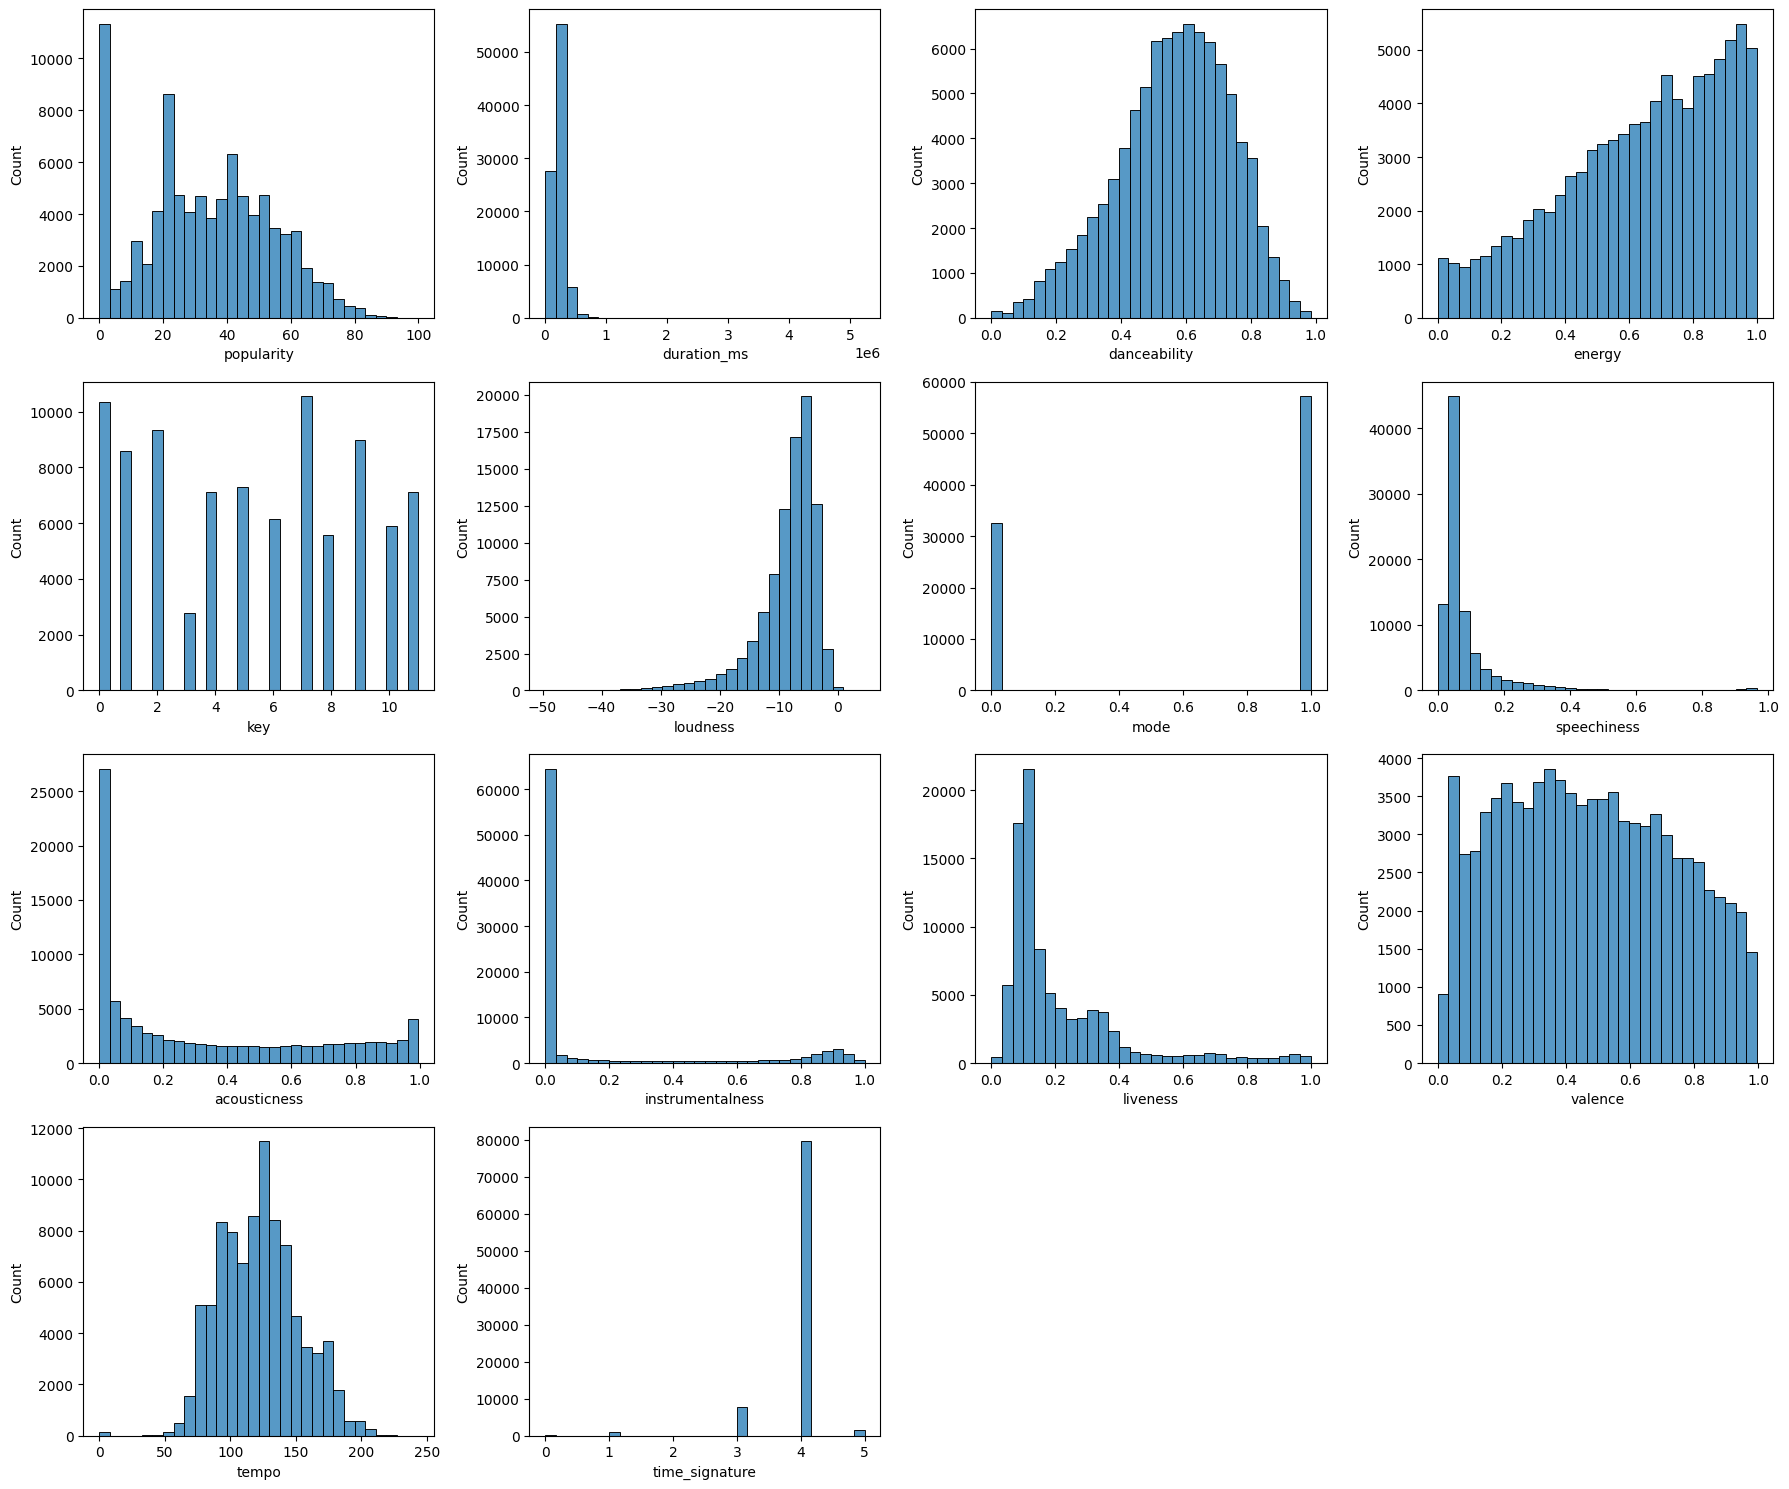

In [ ]:
numeric_features = data_train[['popularity', 'duration_ms', 'danceability', 'energy', 'key',
                   'loudness', 'mode', 'speechiness', 'acousticness',
                   'instrumentalness', 'liveness', 'valence', 'tempo',
                   'time_signature']]

plt.figure(figsize=(18, 15))
for i, feature in enumerate(numeric_features, 1):
  plt.subplot(4, 4, i)
  sns.histplot(
      numeric_features[feature],
      bins=30
  )

plt.tight_layout()
plt.show()

1. **Распределение popularity**

Распределение скошено влево - большинство треков имеют среднюю популярность (40-70);

2. **Распределение duration_ms**

Нормальное распределение  с пиком около 180-240 секунд;

3. **Распределение energy**

Распределение смещено вправо - большинство треков имеют высокую энергичность;

4. **Распределение loudness**

Нормальное распределение с пиком около -10;

#Feature engineering

**track_name_word_count** - количество слов в названии трека

In [ ]:
data_train['track_name_word_count'] = data_train['track_name'].str.split().str.len()

**artist_track_count** - количество треков исполнителя

In [ ]:
data_train['artist_track_count'] = data_train.groupby('artists')['track_name'].transform('count')

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   artists                89740 non-null  object 
 1   album_name             89740 non-null  object 
 2   track_name             89740 non-null  object 
 3   popularity             89740 non-null  int64  
 4   duration_ms            89740 non-null  int64  
 5   explicit               89740 non-null  bool   
 6   danceability           89740 non-null  float64
 7   energy                 89740 non-null  float64
 8   key                    89740 non-null  int64  
 9   loudness               89740 non-null  float64
 10  mode                   89740 non-null  int64  
 11  speechiness            89740 non-null  float64
 12  acousticness           89740 non-null  float64
 13  instrumentalness       89740 non-null  float64
 14  liveness               89740 non-null  float64
 15  valenc

# Кодирование категориальных переменных

In [ ]:
enc = OrdinalEncoder()
data_train['explicit'] = data_train['explicit'].astype(int)
data_train['artists'] = enc.fit_transform(data_train[['artists']])
data_train['album_name'] = enc.fit_transform(data_train[['album_name']])
data_train['track_name'] = enc.fit_transform(data_train[['track_name']])
data_train['track_genre'] = enc.fit_transform(data_train[['track_genre']])
data_train

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_name_word_count,artist_track_count
0,10357.0,8100.0,11741.0,73,230666,0,0.676,0.4610,1,-6.746,...,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,0.0,1,7
1,3287.0,14796.0,22528.0,55,149610,0,0.420,0.1660,1,-17.235,...,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,0.0,3,9
2,12397.0,39162.0,60774.0,57,210826,0,0.438,0.3590,0,-9.734,...,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,0.0,3,1
3,14839.0,8580.0,9580.0,71,201933,0,0.266,0.0596,0,-18.515,...,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,0.0,5,15
4,5255.0,16899.0,25689.0,82,198853,0,0.618,0.4430,2,-9.681,...,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,0.0,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,22486.0,66.0,53329.0,21,384999,0,0.172,0.2350,5,-16.393,...,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,112.0,4,4
113996,22486.0,66.0,65090.0,22,385000,0,0.174,0.1170,0,-18.318,...,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,112.0,3,4
113997,4952.0,5028.0,38207.0,22,271466,0,0.629,0.3290,0,-10.895,...,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,112.0,2,14
113998,18534.0,7238.0,21507.0,41,283893,0,0.587,0.5060,7,-10.889,...,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,112.0,1,28


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89740 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   artists                89740 non-null  float64
 1   album_name             89740 non-null  float64
 2   track_name             89740 non-null  float64
 3   popularity             89740 non-null  int64  
 4   duration_ms            89740 non-null  int64  
 5   explicit               89740 non-null  int64  
 6   danceability           89740 non-null  float64
 7   energy                 89740 non-null  float64
 8   key                    89740 non-null  int64  
 9   loudness               89740 non-null  float64
 10  mode                   89740 non-null  int64  
 11  speechiness            89740 non-null  float64
 12  acousticness           89740 non-null  float64
 13  instrumentalness       89740 non-null  float64
 14  liveness               89740 non-null  float64
 15  valenc

# Корреляционный анализ

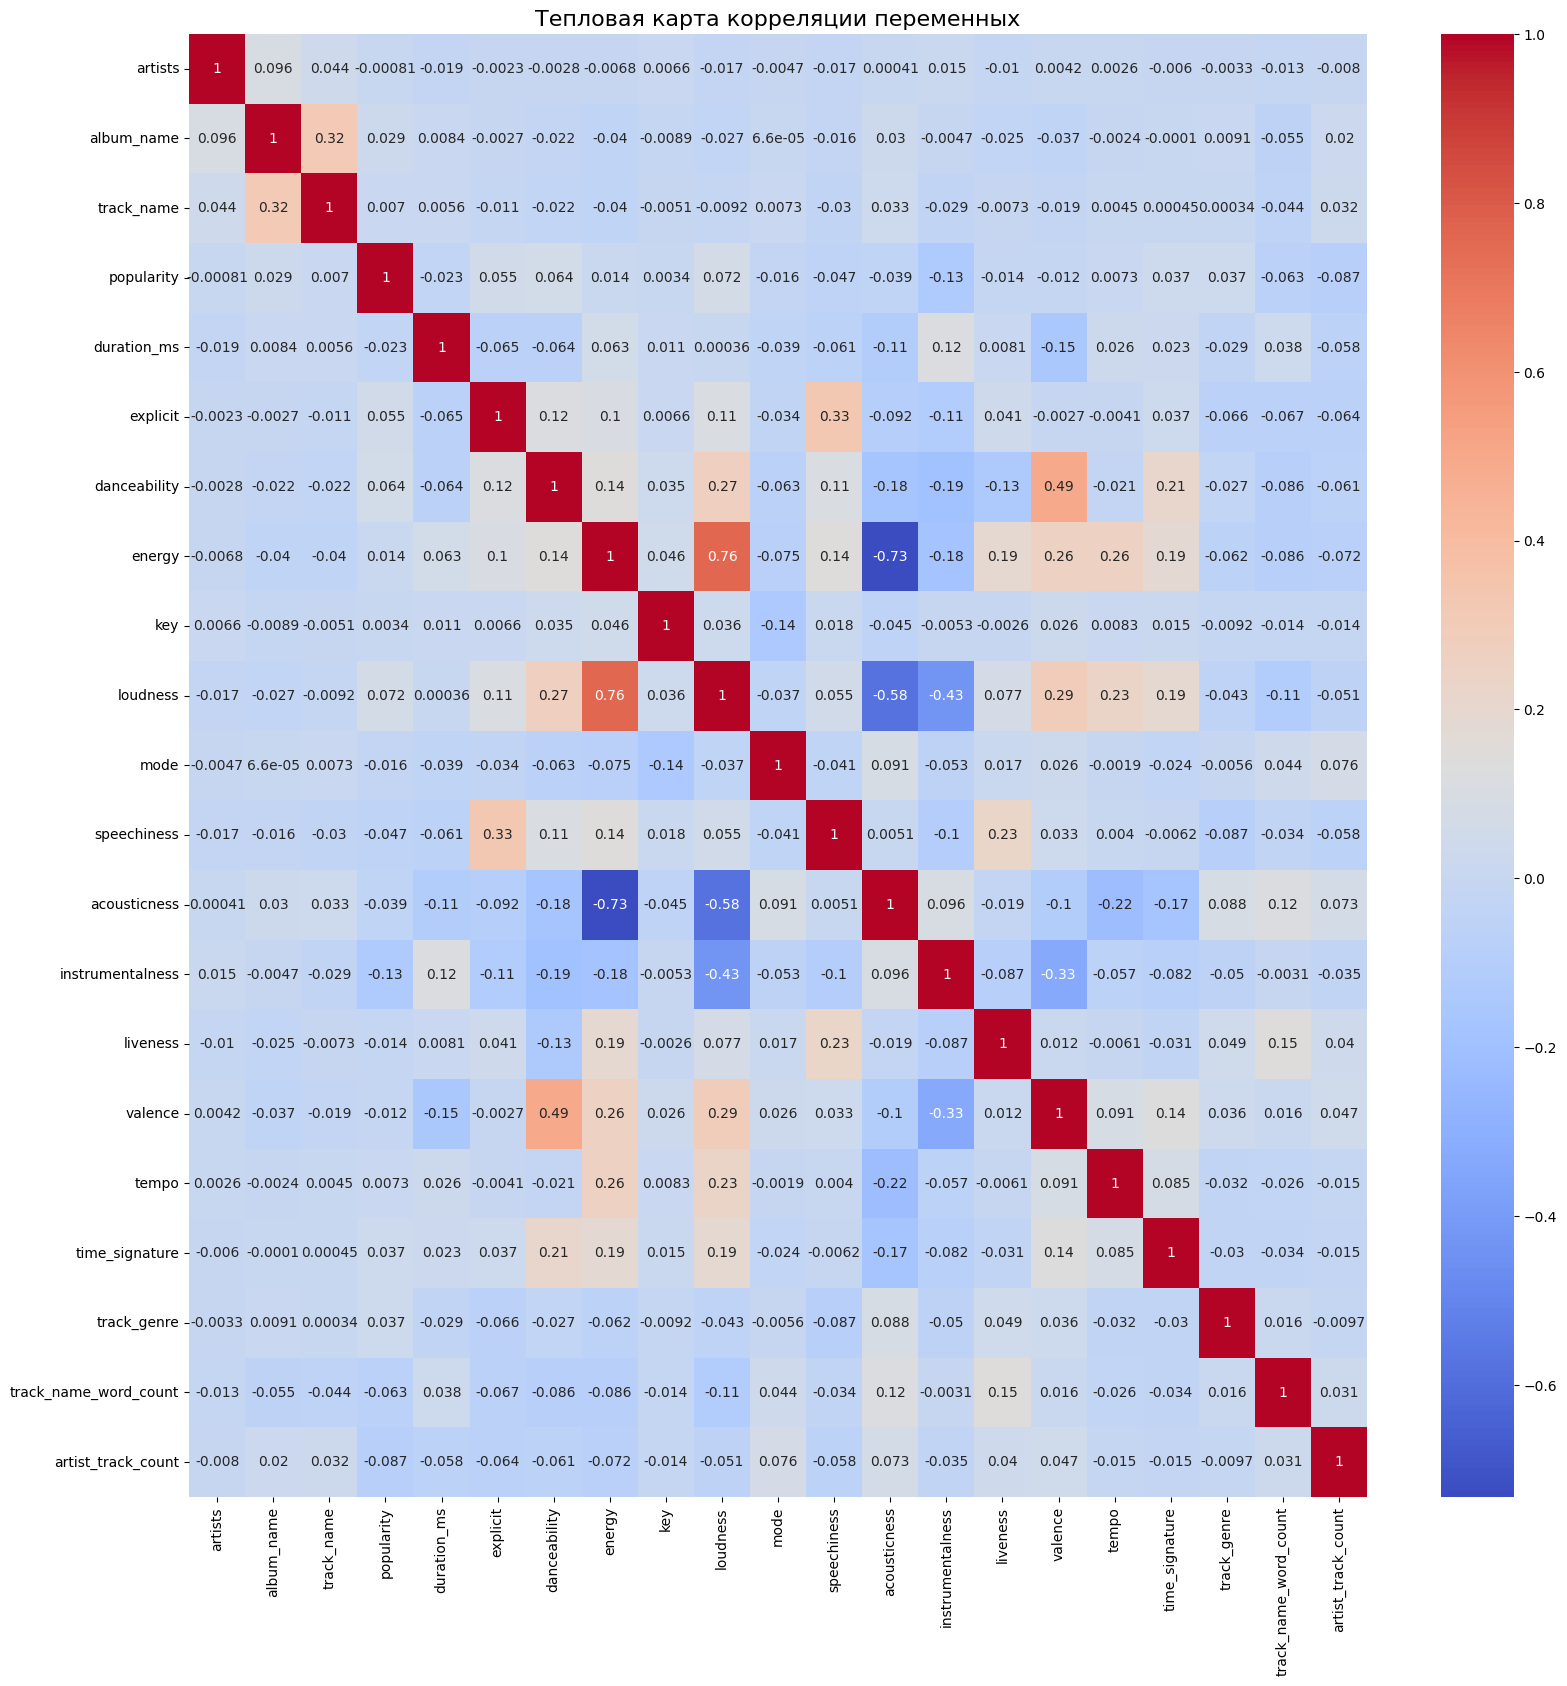

In [ ]:
plt.figure(figsize=(19, 19))
sns.heatmap(data_train.corr(), annot=True, cmap='coolwarm', cbar=True)
plt.title('Тепловая карта корреляции переменных', fontsize=16)
plt.show()

Наибольшую корреляцию с целевой переменной(popularity): -0,13 имеет класс instrumentalness, остальные классы показывают значения < 0,1.

# Эксперименты с моделями

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split, KFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from scipy.stats import loguniform
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score
from joblib import parallel_backend
import time

Разбиение на тестовую и тренировачную выборки

In [ ]:
y = target = data_train.loc[:,'popularity']
X = data_train.drop(['popularity'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
models = [
    ("LinearRegression", LinearRegression()),
    ("DecisionTree", DecisionTreeRegressor(random_state=42)),
    ("RandomForest", RandomForestRegressor(random_state=42)),
    ("GradientBoosting", GradientBoostingRegressor(random_state=42)),
    ("XGBoost", XGBRegressor(random_state=42, eval_metric='logloss')),
    ("LightGBM", LGBMRegressor(random_state=42, verbose=-1))
]

In [ ]:
param_distributions = {
    "LinearRegression": {},
    "DecisionTree": {
        'max_depth': [3, 5, 7, None],
        'min_samples_split': [2, 5, 10]
    },
    "RandomForest": {
        'n_estimators': [100, 200],
        'max_depth': [5, 10, None],
        'min_samples_split': [2, 5],
        'max_features': ['sqrt', 0.5]
    },
    "GradientBoosting": {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 4],
        'min_samples_split': [2, 5]
    },
    "XGBoost": {
        'n_estimators': [100, 200],
        'max_depth': [3, 5],
        'learning_rate': [0.05, 0.1],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    "LightGBM": {
        'n_estimators': [100, 200],
        'num_leaves': [31, 63],
        'learning_rate': [0.05, 0.1],
        'feature_fraction': [0.8, 1.0]
    }
}

Масштабирование числовых переменных

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('standard', StandardScaler(), X_train.columns)
    ],
    remainder='drop'
)

standard_data = preprocessor.fit_transform(X_train)
X_train_standard = pd.DataFrame(
    standard_data,
    columns=preprocessor.get_feature_names_out()
)
X_train_standard.columns = X_train_standard.columns.str.replace('standard__', '')

standard_data = preprocessor.transform(X_test)
X_test_standard = pd.DataFrame(
    standard_data,
    columns=preprocessor.get_feature_names_out()
)
X_test_standard.columns = X_test_standard.columns.str.replace('standard__', '')

In [ ]:
X_train_standard

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_name_word_count,artist_track_count
0,1.009970,-0.602347,-0.681821,0.710725,-0.307040,-0.533028,0.024333,1.324519,0.118229,-1.321411,0.162498,-0.933029,0.518137,0.762400,-1.227439,0.528742,0.226516,-0.627631,-0.948317,-0.559423
1,1.662015,1.600835,1.522871,-0.031391,-0.307040,0.016186,-0.653577,-0.078251,0.144947,-1.321411,-0.343846,0.931296,-0.536328,-0.585720,-1.341448,-0.317769,-1.973141,-0.597588,-0.948317,-0.488959
2,-1.380493,0.361058,0.180057,0.251217,-0.307040,-2.344869,1.337296,0.202303,0.855078,-1.321411,0.875783,-0.969019,-0.536071,-0.701054,-0.490181,-1.859169,0.226516,-1.408747,-0.948317,0.180445
3,-0.511946,-0.671979,-1.580573,0.220318,-0.307040,-0.482070,-0.560072,1.043965,-1.242299,0.756767,-0.403727,-0.828404,-0.536320,-0.766665,0.801921,0.287352,0.226516,0.874515,-0.554732,-0.559423
4,-1.017485,-0.162216,-0.601902,-0.648572,3.256906,1.901632,0.164590,1.605073,0.396671,-1.321411,1.368918,-0.903178,-0.536328,0.680386,0.414291,0.264785,0.226516,0.453914,-0.948317,-0.559423
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71787,1.339967,1.201458,0.751922,1.282928,-0.307040,0.248328,0.152902,1.605073,0.289798,-1.321411,-0.142189,-0.522806,-0.403441,-0.549838,-1.394653,-0.317569,0.226516,-1.408747,-0.554732,-0.524191
71788,0.426818,-1.124730,-1.599604,-0.676000,-0.307040,1.182558,-1.857451,0.202303,-0.357545,-1.321411,-0.224085,1.676080,-0.536328,-0.375557,0.133068,0.266280,0.226516,0.333742,2.593950,-0.101410
71789,0.725681,0.559113,-1.679997,-1.107073,-0.307040,0.599372,-0.162677,-0.919913,0.081015,0.756767,-0.336801,0.603237,-0.536328,0.142163,1.288360,1.395393,0.226516,1.295116,0.232439,0.250908
71790,1.287415,-0.367323,-0.436228,-0.107416,-0.307040,-0.799142,-2.056149,0.202303,-1.276841,0.756767,-0.475936,1.832721,-0.536328,-0.662096,-1.333848,-0.592993,0.226516,-1.589004,-0.161147,-0.242337


In [ ]:
X_test_standard

,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_name_word_count,artist_track_count
0,-0.709790,-0.423890,-0.776357,-0.635839,-0.307040,1.714786,-0.240597,-0.078251,0.572438,0.756767,-0.173891,-0.714027,-0.536328,0.449719,0.357286,-0.899392,0.226516,0.423871,-0.161147,0.990775
1,0.575311,0.407231,-0.274919,-0.077688,-0.307040,1.267488,0.900940,1.605073,-0.239604,0.756767,-0.419578,-0.123815,-0.536328,0.142163,1.892608,0.237698,0.226516,1.595545,-0.554732,-0.383264
2,1.116179,-0.689349,-0.997746,1.091169,-0.307040,0.752246,-0.201637,-0.919913,0.044945,-1.321411,-0.504115,-0.505073,-0.536094,-0.818437,1.866006,0.084748,0.226516,-1.018189,-0.161147,-0.171873
3,0.786403,0.620876,0.620986,0.123679,-0.307040,-0.323534,-1.124997,-0.919913,-0.343423,0.756767,-0.539339,0.804210,-0.536321,-0.710280,-0.349570,-0.985372,-1.973141,0.634172,-0.161147,-0.524191
4,-0.753178,0.111558,0.280999,0.663672,-0.307040,-1.110552,-0.661369,-0.919913,0.728167,-1.321411,-0.510279,0.881053,-0.523502,-0.288416,-0.440777,-0.183796,0.226516,1.625588,-0.948317,-0.524191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17943,-1.720868,-1.244914,-1.351543,-0.726212,-0.307040,-0.657592,-0.750978,0.763411,-1.166533,0.756767,0.787723,1.365754,1.159449,0.803408,0.539701,-0.195262,-1.973141,-0.627631,-0.161147,-0.559423
17944,-0.671479,-1.283739,0.718416,0.210102,-0.307040,0.622020,0.308743,-0.358805,0.006585,-1.321411,-0.527011,-0.705160,-0.534488,-0.319171,0.471295,0.264220,0.226516,0.934601,-0.554732,-0.136641
17945,0.435539,0.830363,0.786423,-0.456345,3.256906,0.016186,-0.493840,1.324519,0.315562,-1.321411,0.171304,0.088981,-0.536310,-0.534461,-0.368571,0.092658,0.226516,-1.138360,-0.948317,-0.453727
17946,0.073415,-0.821782,-0.898655,0.324924,-0.307040,1.041008,0.869772,-0.078251,0.485413,-1.321411,-0.184458,0.130358,-0.534284,-0.478075,1.828003,1.525710,0.226516,1.415287,-0.161147,0.074749


Подберём лучшие параметры для каждой модели.

In [ ]:
def run_random_search(models, param_distributions, X_train, y_train, X_test, y_test):
    results = []
    best_models = {}

    for model_name, model in models:
        print(f"\nПодбор параметров для {model_name}")
        start_time = time.time()

        try:
            cv = KFold(n_splits=5, shuffle=True, random_state=42)

            search = RandomizedSearchCV(
                estimator=model,
                param_distributions=param_distributions[model_name],
                n_iter=5,
                cv=cv,
                scoring= 'neg_root_mean_squared_error',
                n_jobs=-1,
                verbose=2,
                random_state=42,
                error_score='raise',
                return_train_score=True
            )

            with parallel_backend('loky', idle_worker_timeout=600):
                search.fit(X_train, y_train)

                best_models[model_name] = search.best_estimator_

                results.append({
                    'Model': model_name,
                    'RMSE': -search.best_score_,
                    'Лучшие параметры': search.best_params_,
                    'Время': (time.time() - start_time)/60
                })

                print(f"\nРезультаты для {model_name}:")
                print(f"RMSE: {-search.best_score_:.4f}")
                print(f"Лучшие параметры: {search.best_params_}")
                print(f"Время выполнения: {(time.time()-start_time)/60:.1f} мин")

        except Exception as e:
            print(f"Ошибка при подборе параметров для {model_name}: {str(e)}")
            results.append({
                'Model': model_name,
                'RMSE': None,
                'Лучшие параметры': None,
                'Время': None
            })

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values('RMSE', ascending=True)

    print("\nИтоговые результаты")
    print(results_df[['Model', 'RMSE', 'Лучшие параметры', 'Время']]
          .to_string(index=False, float_format="%.3f"))

    best_model_name = results_df.iloc[0]['Model']
    print(f"\nЛучшая модель: {best_model_name}")
    print(f"RMSE: {results_df.iloc[0]['RMSE']:.4f}")
    print(f"Лучшие параметры: {results_df.iloc[0]['Лучшие параметры']}")

    return results_df, best_models

results_df, best_models = run_random_search(
    models,
    param_distributions,
    X_train_standard,
    y_train,
    X_test_standard,
    y_test
)


Подбор параметров для LinearRegression
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Результаты для LinearRegression:
RMSE: 20.1340
Лучшие параметры: {}
Время выполнения: 0.1 мин

Подбор параметров для DecisionTree
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Результаты для DecisionTree:
RMSE: 18.8404
Лучшие параметры: {'min_samples_split': 10, 'max_depth': 7}
Время выполнения: 0.4 мин

Подбор параметров для RandomForest
Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Результаты для RandomForest:
RMSE: 15.9583
Лучшие параметры: {'n_estimators': 100, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None}
Время выполнения: 9.0 мин

Подбор параметров для GradientBoosting
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Результаты для GradientBoosting:
RMSE: 15.9856
Лучшие параметры: {'n_estimators': 200, 'min_samples_split': 2, 'max_depth': 4, 'learning_rate': 0.1}
Время выполнения: 22.8 мин

Подбор параметров для XGBoost
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Результаты для XGBoost:
RMSE: 15.4745
Лучшие параметры: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Время выполнения: 0.4 мин

Подбор параметров для LightGBM
Fitting 5 folds for each of 5 candidates, totalling 25 fits

Результаты для LightGBM:
RMSE: 15.0380
Лучшие параметры: {'num_leaves': 63, 'n_estimators': 100, 'learning_rate': 0.1, 'feature_fraction': 0.8}
Время выполнения: 0.8 мин

Итого

Лучшая модель: LightGBM

RMSE: 15.0380

Лучшие параметры: num_leaves: 63, n_estimators: 100, learning_rate: 0.1, feature_fraction: 0.8

In [ ]:
param_dist = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'batch_size': [64, 128],
    'solver': ['adam'],
    'early_stopping': [True],
    'validation_fraction': [0.1],
    'beta_1': [0.8, 0.9],
    'beta_2': [0.99, 0.999],
    'max_iter': [200, 300]
}

mlp = MLPRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_dist,
    n_iter=5,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=2,
    verbose=2,
    random_state=42
)

print("Подбор параметров для MLPRegressor")

search.fit(X_train_standard, y_train)

print(f"RMSE:{-search.best_score_:.4f}")
print("Лучшие параметры:", search.best_params_)

Подбор параметров для MLPRegressor
Fitting 3 folds for each of 5 candidates, totalling 15 fits
RMSE:18.4453
Лучшие параметры: {'validation_fraction': 0.1, 'solver': 'adam', 'max_iter': 200, 'learning_rate_init': 0.001, 'hidden_layer_sizes': (100,), 'early_stopping': True, 'beta_2': 0.999, 'beta_1': 0.8, 'batch_size': 64, 'alpha': 0.01, 'activation': 'tanh'}


Для MLPRegressor лучшее значение RMSE:18.4453,

лучшие параметры: validation_fraction: 0.1, solver: adam, max_iter: 200, learning_rate_init: 0.001, hidden_layer_sizes: (100,), early_stopping: True, beta_2: 0.999, beta_1: 0.8, batch_size: 64, alpha: 0.01, activation: tanh


Проверка работы лучшей модели на тестовых данных

In [ ]:
best_params = {
     'num_leaves': 63, 'n_estimators': 100, 'learning_rate': 0.1, 'feature_fraction': 0.8
}

lgb = LGBMRegressor(**best_params, random_state=42, verbose=-1)
lgb.fit(X_train_standard, y_train)
y_pred = lgb.predict(X_test_standard)
mse = mean_squared_error(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2: {r2:.4f}")

MSE: 222.1709
RMSE: 14.9054
R2: 0.4688


**Итог:**

Лучшая модель: LGBMRegressor со значениями RMSE: 15.0380 и 14.9054 для тренировочной и тестовой выборок, соответственно.